In [1]:
import pandas as pd

data = pd.read_csv('./per_step_delay.csv')

data["rho"] = data["rho"].replace({
    0.0: r"$ \rho_0 $",
    0.5: r"$ \rho_2 $",
    0.25: r"$ \rho_4 $",
    0.125: r"$ \rho_8 $"
}).astype(pd.CategoricalDtype(
    reversed([r"$ \rho_2 $", r"$ \rho_4 $", r"$ \rho_8 $", r"$ \rho_0 $"]),
    ordered=True,
))

data["scale"] = data["scale"].astype(pd.CategoricalDtype([0.1, 0.2, 0.4, 0.8, 1.6, 3.2], ordered=True))

data["model"] = data["model"].replace({
    "first-order": "Ref. Stochastic",
    "first-order-median": "Ref. Median",
    "3rd-poly-low": "3rd Order Poly. (low neuroticism)",
    "3rd-poly-high": "3rd Order Poly. (high neuroticism)",
    "legacy": "Legacy EdgeDroid 1.0"
}).astype("category")

data

,step_number,last_frame_rtt,execution_time,step_duration,time_to_feedback,wait_time,frame_count,model,rep,s_param,rho,scale
0,0,0.379709,0.000000,0.379709,0.379709,0.000000,1,3rd Order Poly. (high neuroticism),0,1.2,$ \rho_0 $,0.4
1,1,0.254980,5.088823,5.354576,0.265753,0.010773,21,3rd Order Poly. (high neuroticism),0,1.2,$ \rho_0 $,0.4
2,2,0.225312,5.050452,5.407490,0.357038,0.131726,24,3rd Order Poly. (high neuroticism),0,1.2,$ \rho_0 $,0.4
3,3,0.480440,5.081516,5.765285,0.683769,0.203329,12,3rd Order Poly. (high neuroticism),0,1.2,$ \rho_0 $,0.4
4,4,1.258972,4.861119,6.294861,1.433742,0.174770,5,3rd Order Poly. (high neuroticism),0,1.2,$ \rho_0 $,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...
214195,46,0.346282,5.230947,5.886789,0.655842,0.309560,17,Ref. Median,29,1.2,$ \rho_2 $,3.2
214196,47,0.528507,5.230947,5.813574,0.582627,0.054120,11,Ref. Median,29,1.2,$ \rho_2 $,3.2
214197,48,7.350258,5.230947,14.700516,9.469569,2.119311,2,Ref. Median,29,1.2,$ \rho_2 $,3.2
214198,49,20.980018,5.230947,41.960035,36.729088,15.749071,2,Ref. Median,29,1.2,$ \rho_2 $,3.2


In [2]:
data.groupby(["model", "rho", "scale"], observed=True).count()

step_number  \
model                              rho        scale                
3rd Order Poly. (high neuroticism) $ \rho_0 $ 0.1           1530   
                                              0.2           1530   
                                              0.4           1530   
                                              0.8           1530   
                                              1.6           1530   
...                                                          ...   
Ref. Stochastic                    $ \rho_2 $ 0.2           1530   
                                              0.4           1530   
                                              0.8           1530   
                                              1.6           1530   
                                              3.2           1530   

                                                     last_frame_rtt  \
model                              rho        scale                   
3rd Order Poly. (high neuroticism) $ \rho_0 $ 0.1              1530   
                                              0.2              1530   
                                              0.4              1530   
                                              0.8              1530   
                                              1.6              1530   
...                                                             ...   
Ref. Stochastic                    $ \rho_2 $ 0.2              1530   
                                              0.4              1530   
                                              0.8              1530   
                                              1.6              1530   
                                              3.2              1530   

                                                     execution_time  \
model                              rho        scale                   
3rd Order Poly. (high neuroticism) $ \rho_0 $ 0.1              1530   
                                              0.2              1530   
                                              0.4              1530   
                                              0.8              1530   
                                              1.6              1530   
...                                                             ...   
Ref. Stochastic                    $ \rho_2 $ 0.2              1530   
                                              0.4              1530   
                                              0.8              1530   
                                              1.6              1530   
                                              3.2              1530   

                                                     step_duration  \
model                              rho        scale                  
3rd Order Poly. (high neuroticism) $ \rho_0 $ 0.1             1530   
                                              0.2             1530   
                                              0.4             1530   
                                              0.8             1530   
                                              1.6             1530   
...                                                            ...   
Ref. Stochastic                    $ \rho_2 $ 0.2             1530   
                                              0.4             1530   
                                              0.8             1530   
                                              1.6             1530   
                                              3.2             1530   

                                                     time_to_feedback  \
model                              rho        scale                     
3rd Order Poly. (high neuroticism) $ \rho_0 $ 0.1                1530   
                                              0.2                1530   
                                              0.4                1530   
                                            

In [3]:
total_durations = data.groupby(["model", "rep", "rho", "scale"], observed=True)["step_duration"].sum().reset_index()
total_durations

,model,rep,rho,scale,step_duration
0,3rd Order Poly. (high neuroticism),0,$ \rho_0 $,0.1,231.685598
1,3rd Order Poly. (high neuroticism),0,$ \rho_0 $,0.2,271.642743
2,3rd Order Poly. (high neuroticism),0,$ \rho_0 $,0.4,314.307277
3,3rd Order Poly. (high neuroticism),0,$ \rho_0 $,0.8,370.563679
4,3rd Order Poly. (high neuroticism),0,$ \rho_0 $,1.6,482.800592
...,...,...,...,...,...
3595,Ref. Stochastic,29,$ \rho_2 $,0.2,355.882122
3596,Ref. Stochastic,29,$ \rho_2 $,0.4,352.292671
3597,Ref. Stochastic,29,$ \rho_2 $,0.8,479.877972
3598,Ref. Stochastic,29,$ \rho_2 $,1.6,631.197174


mean duration


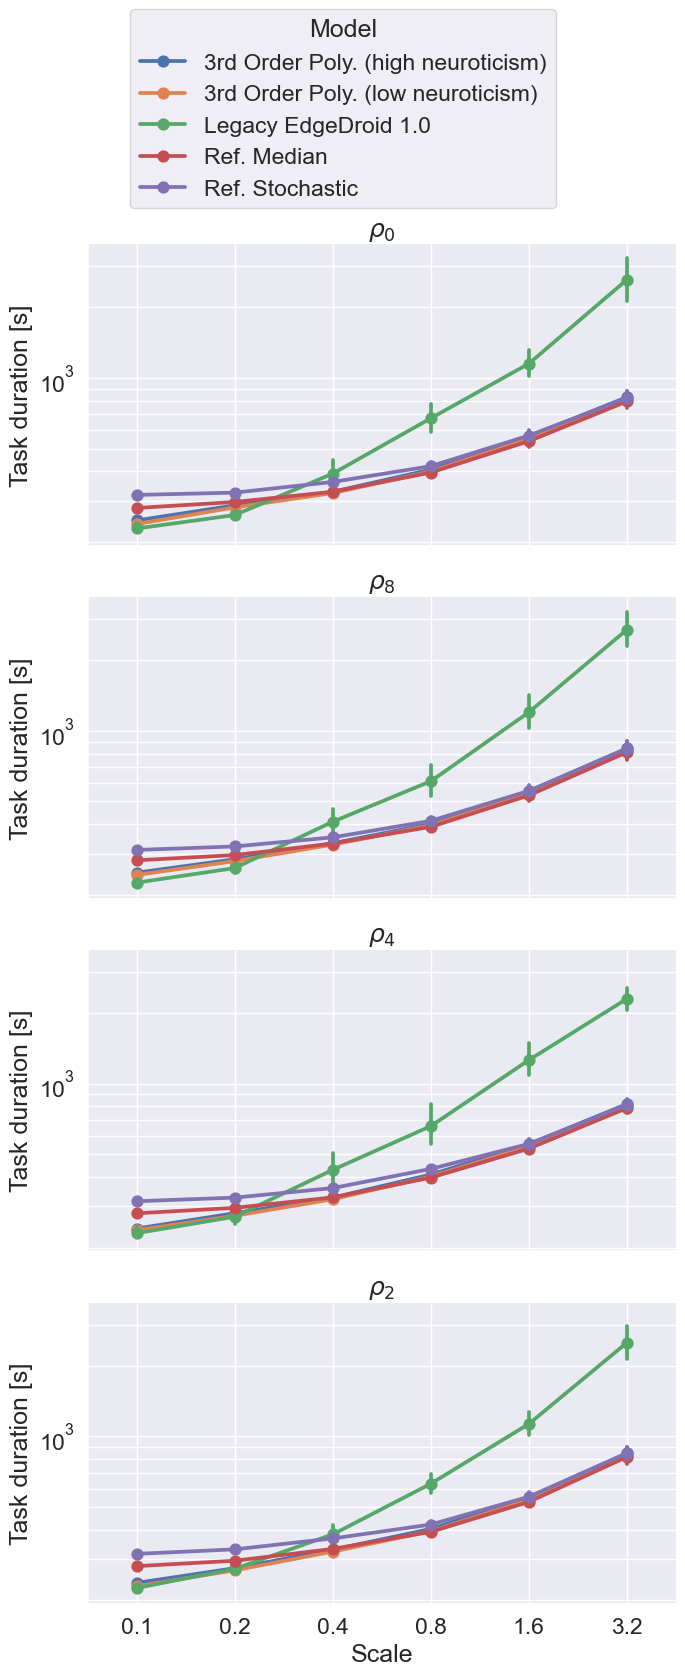

In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("paper")
sns.set(font_scale=1.5)
DOUBLE_COL_FIGW = 7.16

print("mean duration")
fg = sns.catplot(kind="point", data=total_durations, hue="model", y="step_duration", x="scale", row="rho", aspect=1, legend_out=False)
fg.set_axis_labels(r"Scale", "Task duration [s]")
fg.set_titles(row_template=r"{row_name}")
fg.set(yscale="log")

for ax in fg.axes.flat:
    # ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')
    # ax.set_yscale("log", base=2)
    ax.yaxis.grid(True, which="minor")
    ax.yaxis.grid(True, which="major")
    ax.xaxis.grid(True)

# fg.set(yscale="log")

fg.legend.set_title("Model")
sns.move_legend(fg, "upper center", bbox_to_anchor=(.5, 1.13), ncols=1)
fg.figure.set_size_inches((2*3.6, 2*7.5))
fg.tight_layout()
plt.show()


mean duration


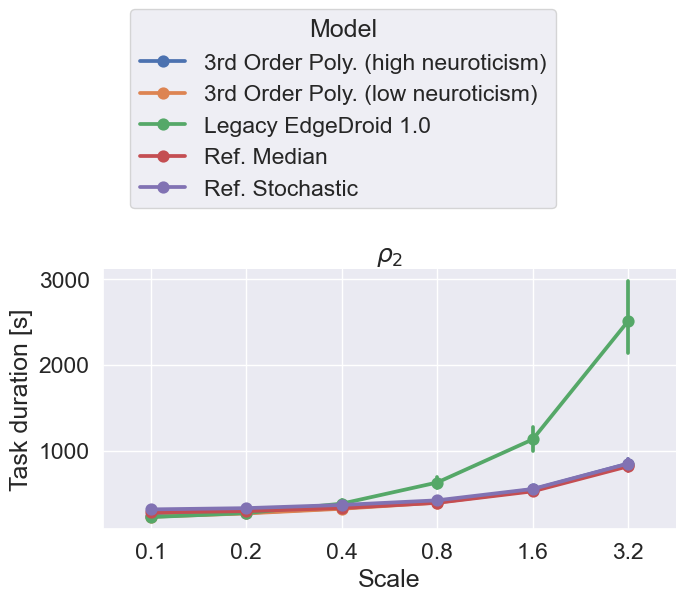

In [20]:
print("mean duration")

total_durations_rho2 = total_durations[total_durations["rho"] == r"$ \rho_2 $"].copy()
total_durations_rho2["rho"] = total_durations_rho2["rho"].cat.remove_unused_categories()

fg = sns.catplot(kind="point", data=total_durations_rho2, hue="model", y="step_duration", x="scale", row="rho", aspect=1, legend_out=False)
fg.set_axis_labels(r"Scale", "Task duration [s]")
fg.set_titles(row_template=r"{row_name}")
# fg.set(yscale="log")

for ax in fg.axes.flat:
    # ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')
    # ax.set_yscale("log", base=2)
    ax.yaxis.grid(True, which="minor")
    ax.yaxis.grid(True, which="major")
    ax.xaxis.grid(True)

# fg.set(yscale="log")

fg.legend.set_title("Model")
sns.move_legend(fg, "upper center", bbox_to_anchor=(.5, 1.55), ncols=1)
fg.figure.set_size_inches((2*3.6, 2*2))
fg.tight_layout()
plt.show()

In [5]:
mean_total_durations = (
    total_durations
    .groupby(["model", "rho", "scale"])["step_duration"]
    .mean()
)
mean_total_durations

/var/folders/m2/92s4j7tx64b5y7_fxzjwmp2m0000gn/T/ipykernel_43327/1376219029.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["model", "rho", "scale"])["step_duration"]


model                               rho         scale
3rd Order Poly. (high neuroticism)  $ \rho_0 $  0.1      247.143286
                                                0.2      286.629301
                                                0.4      327.476294
                                                0.8      407.181820
                                                1.6      562.987994
                                                            ...    
Ref. Stochastic                     $ \rho_2 $  0.2      330.238880
                                                0.4      367.561871
                                                0.8      421.357329
                                                1.6      553.634825
                                                3.2      849.574593
Name: step_duration, Length: 120, dtype: float64

In [6]:
import numpy as np

a = mean_total_durations.where(mean_total_durations.index.get_level_values("model") == "3rd Order Poly. (high neuroticism)").groupby(level=[1, 2]).transform("first")
diff_wrt_hn = (mean_total_durations - a) / a

a = mean_total_durations.where(mean_total_durations.index.get_level_values("model") == "3rd Order Poly. (low neuroticism)").groupby(level=[1, 2]).transform("first")
diff_wrt_ln = (mean_total_durations - a) / a

diff_wrt_realistic = pd.merge(diff_wrt_hn, diff_wrt_ln, left_index=True, right_index=True, how="inner", suffixes=("_diff_high_neuro", "_diff_low_neuro")).replace(0.0, np.NaN).reset_index()
diff_wrt_realistic = diff_wrt_realistic.set_index(["model", "rho", "scale"]).stack().reset_index().rename(columns={"level_3": "wrt", 0: "diff"})
diff_wrt_realistic["wrt"] = diff_wrt_realistic["wrt"].apply(lambda x: "diff. w.r.t. low neuro." if x.split("_")[-2] == "low" else "diff w.r.t. high neuro.")

diff_wrt_realistic["rho_scale"] = diff_wrt_realistic[["rho", "scale"]].apply(lambda row: f"( {row.rho}, {row.scale} )" , axis=1)
diff_wrt_realistic["model_wrt"] = diff_wrt_realistic[["model", "wrt"]].apply(lambda row: f"{row.model} {row.wrt}" , axis=1)

diff_wrt_realistic

/var/folders/m2/92s4j7tx64b5y7_fxzjwmp2m0000gn/T/ipykernel_43327/4078550454.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a = mean_total_durations.where(mean_total_durations.index.get_level_values("model") == "3rd Order Poly. (high neuroticism)").groupby(level=[1, 2]).transform("first")
/var/folders/m2/92s4j7tx64b5y7_fxzjwmp2m0000gn/T/ipykernel_43327/4078550454.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a = mean_total_durations.where(mean_total_durations.index.get_level_values("model") == "3rd Order Poly. (low neuroticism)").groupby(level=[1, 2]).transform("first")


,model,rho,scale,wrt,diff,rho_scale,model_wrt
0,3rd Order Poly. (high neuroticism),$ \rho_0 $,0.1,diff. w.r.t. low neuro.,0.035862,"( $ \rho_0 $, 0.1 )",3rd Order Poly. (high neuroticism) diff. w.r.t...
1,3rd Order Poly. (high neuroticism),$ \rho_0 $,0.2,diff. w.r.t. low neuro.,0.020123,"( $ \rho_0 $, 0.2 )",3rd Order Poly. (high neuroticism) diff. w.r.t...
2,3rd Order Poly. (high neuroticism),$ \rho_0 $,0.4,diff. w.r.t. low neuro.,0.012400,"( $ \rho_0 $, 0.4 )",3rd Order Poly. (high neuroticism) diff. w.r.t...
3,3rd Order Poly. (high neuroticism),$ \rho_0 $,0.8,diff. w.r.t. low neuro.,0.018591,"( $ \rho_0 $, 0.8 )",3rd Order Poly. (high neuroticism) diff. w.r.t...
4,3rd Order Poly. (high neuroticism),$ \rho_0 $,1.6,diff. w.r.t. low neuro.,0.020666,"( $ \rho_0 $, 1.6 )",3rd Order Poly. (high neuroticism) diff. w.r.t...
...,...,...,...,...,...,...,...
187,Ref. Stochastic,$ \rho_2 $,0.8,diff. w.r.t. low neuro.,0.067332,"( $ \rho_2 $, 0.8 )",Ref. Stochastic diff. w.r.t. low neuro.
188,Ref. Stochastic,$ \rho_2 $,1.6,diff w.r.t. high neuro.,0.010735,"( $ \rho_2 $, 1.6 )",Ref. Stochastic diff w.r.t. high neuro.
189,Ref. Stochastic,$ \rho_2 $,1.6,diff. w.r.t. low neuro.,0.030512,"( $ \rho_2 $, 1.6 )",Ref. Stochastic diff. w.r.t. low neuro.
190,Ref. Stochastic,$ \rho_2 $,3.2,diff w.r.t. high neuro.,0.001028,"( $ \rho_2 $, 3.2 )",Ref. Stochastic diff w.r.t. high neuro.


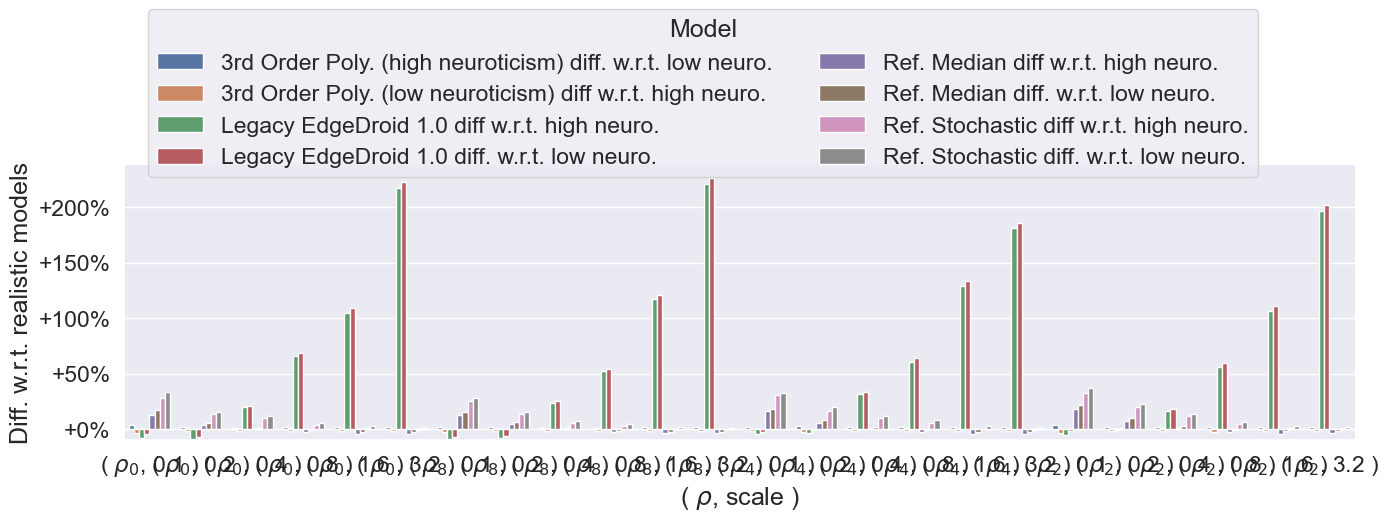

In [7]:
sns.set_context("paper")
sns.set(font_scale=1.5)

fg = sns.catplot(kind="bar", data=diff_wrt_realistic, x="rho_scale", hue="model_wrt", y="diff", legend_out=False)
fg.set_axis_labels(r"( $\rho$, scale )", "Diff. w.r.t. realistic models")
fg.set(ylim=(-0.1, None))

for ax in fg.axes.flat:
    ax.yaxis.set_major_formatter("{x:+.0%}")

sns.move_legend(fg, "upper center", title="Model", bbox_to_anchor=(.5, 1.35), ncols=2)
fg.figure.set_size_inches((2*7.2, 2*2))
fg.tight_layout()
plt.show()

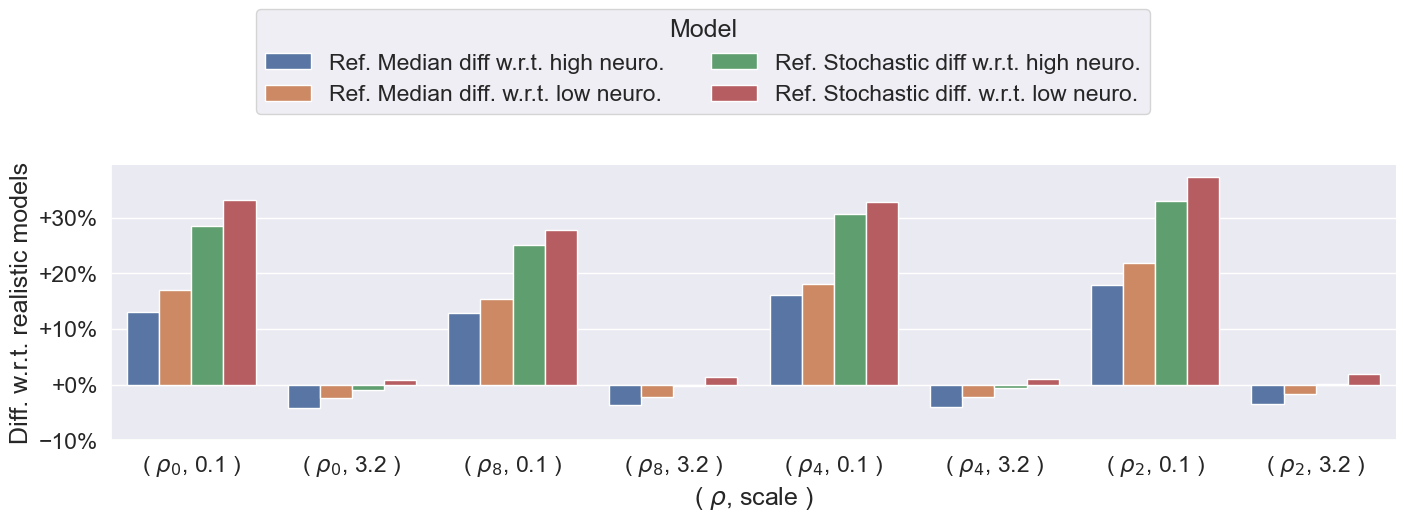

In [8]:
diff_wrt_realistic_ext = diff_wrt_realistic[
    np.isin(diff_wrt_realistic["scale"], (0.1, 3.2))
    & ~np.isin(diff_wrt_realistic["model"], ("Legacy EdgeDroid 1.0", "3rd Order Poly. (high neuroticism)", "3rd Order Poly. (low neuroticism)"))
    ].copy()
diff_wrt_realistic_ext["model"] = diff_wrt_realistic_ext["model"].cat.remove_unused_categories()
diff_wrt_realistic_ext["scale"] = diff_wrt_realistic_ext["scale"].cat.remove_unused_categories()

sns.set_context("paper")
sns.set(font_scale=1.5)

fg = sns.catplot(kind="bar", data=diff_wrt_realistic_ext, x="rho_scale", hue="model_wrt", y="diff", legend_out=False)
fg.set_axis_labels(r"( $\rho$, scale )", "Diff. w.r.t. realistic models")
fg.set(ylim=(-0.1, None))

for ax in fg.axes.flat:
    ax.yaxis.set_major_formatter("{x:+.0%}")

sns.move_legend(fg, "upper center", title="Model", bbox_to_anchor=(.5, 1.35), ncols=2)
fg.figure.set_size_inches((2*7.2, 2*2))
fg.tight_layout()
plt.show()

mean number of frames


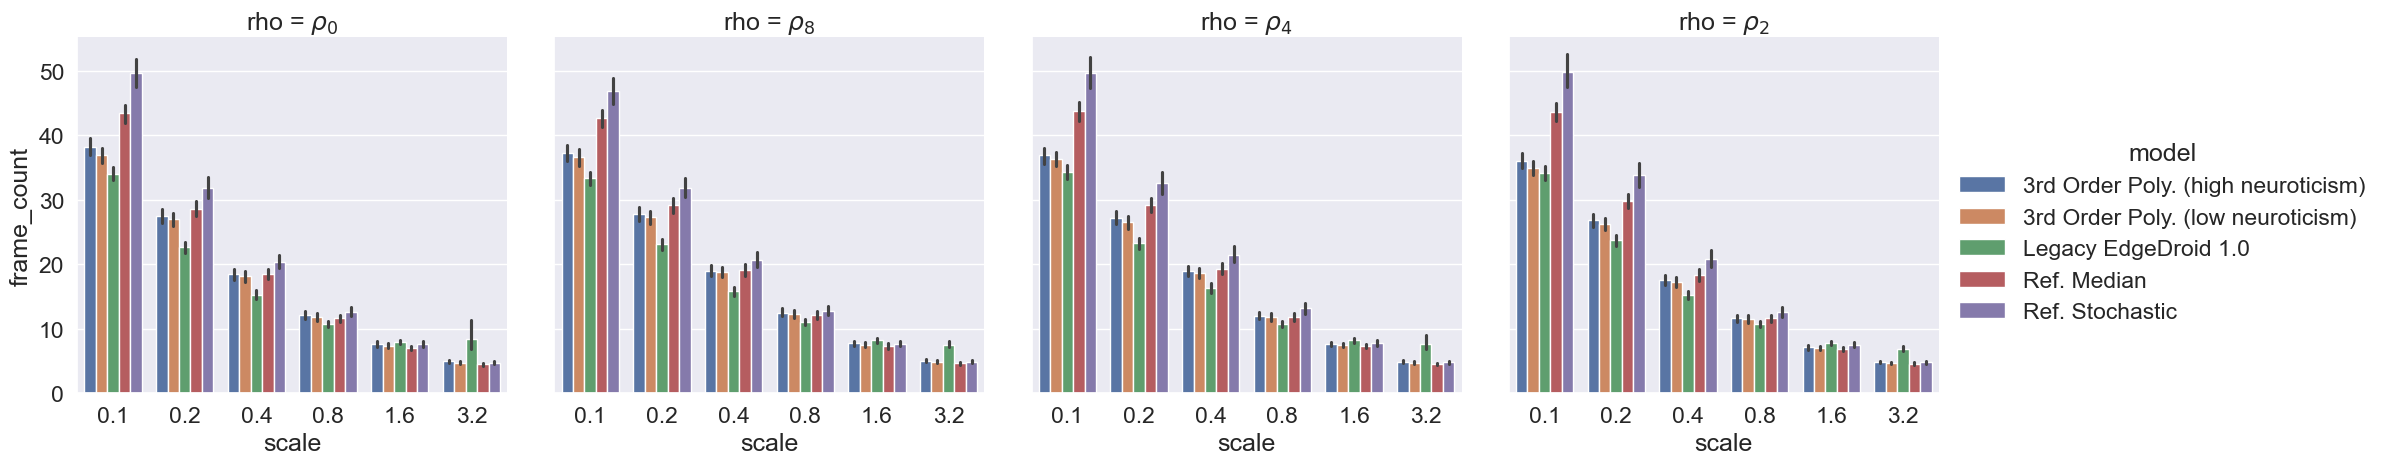

In [9]:
print("mean number of frames")
fg = sns.catplot(kind="bar", data=data, y="frame_count", hue="model", x="scale", col="rho")
plt.show()

mean TTF


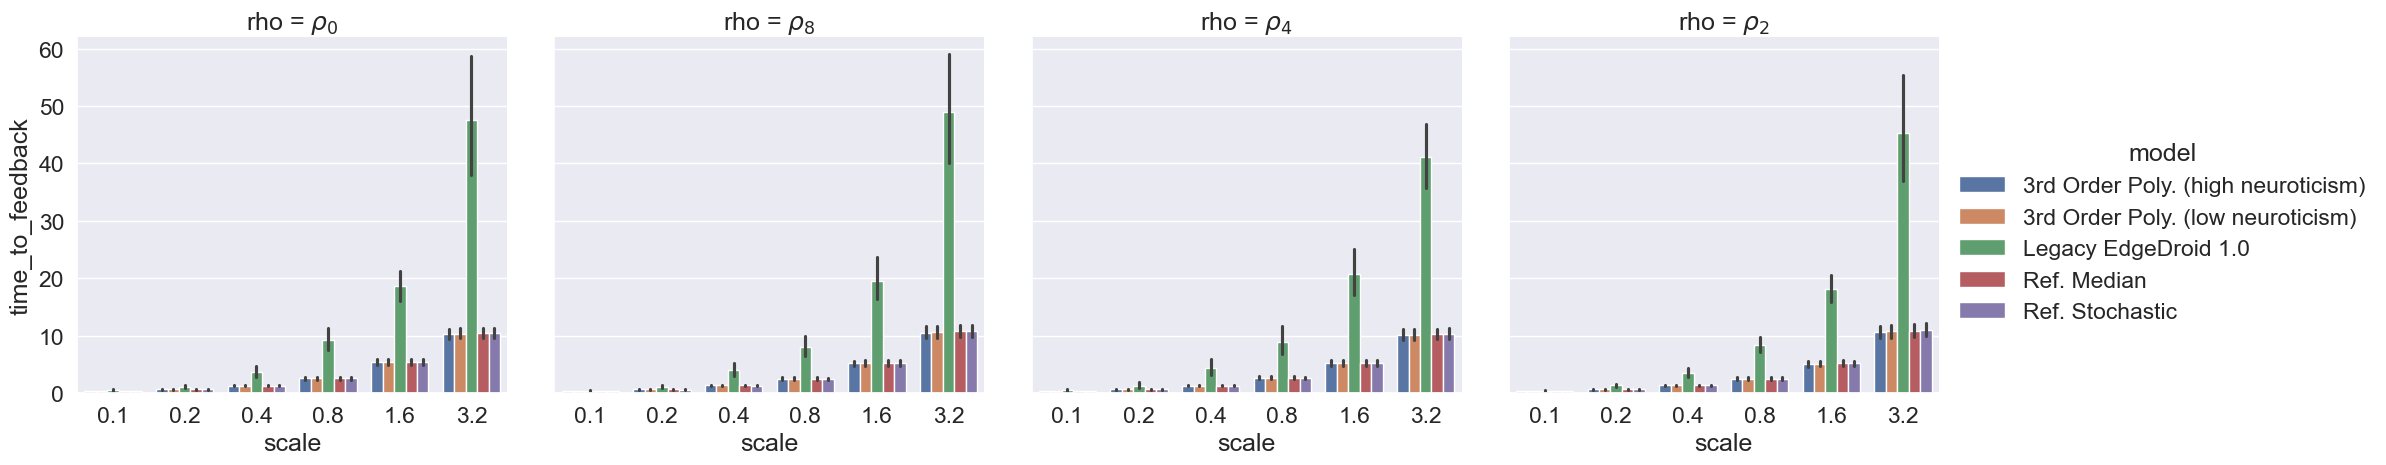

In [10]:
print("mean TTF")
fg = sns.catplot(kind="bar", data=data, hue="model", y="time_to_feedback", x="scale", col="rho")
plt.show()

mean wait time


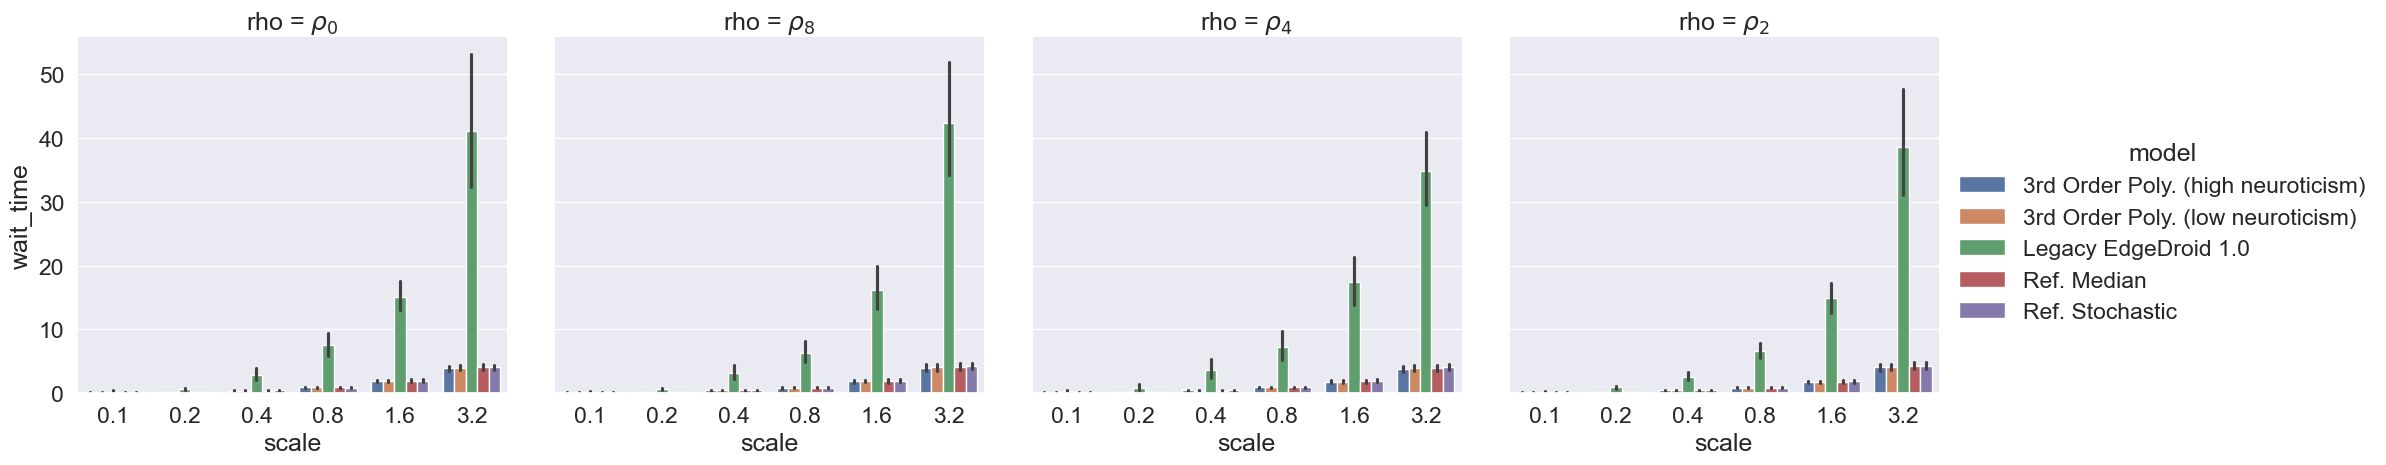

In [11]:
print("mean wait time")
fg = sns.catplot(kind="bar", data=data, hue="model", y="wait_time", x="scale", col="rho")
plt.show()

mean last frame rtt


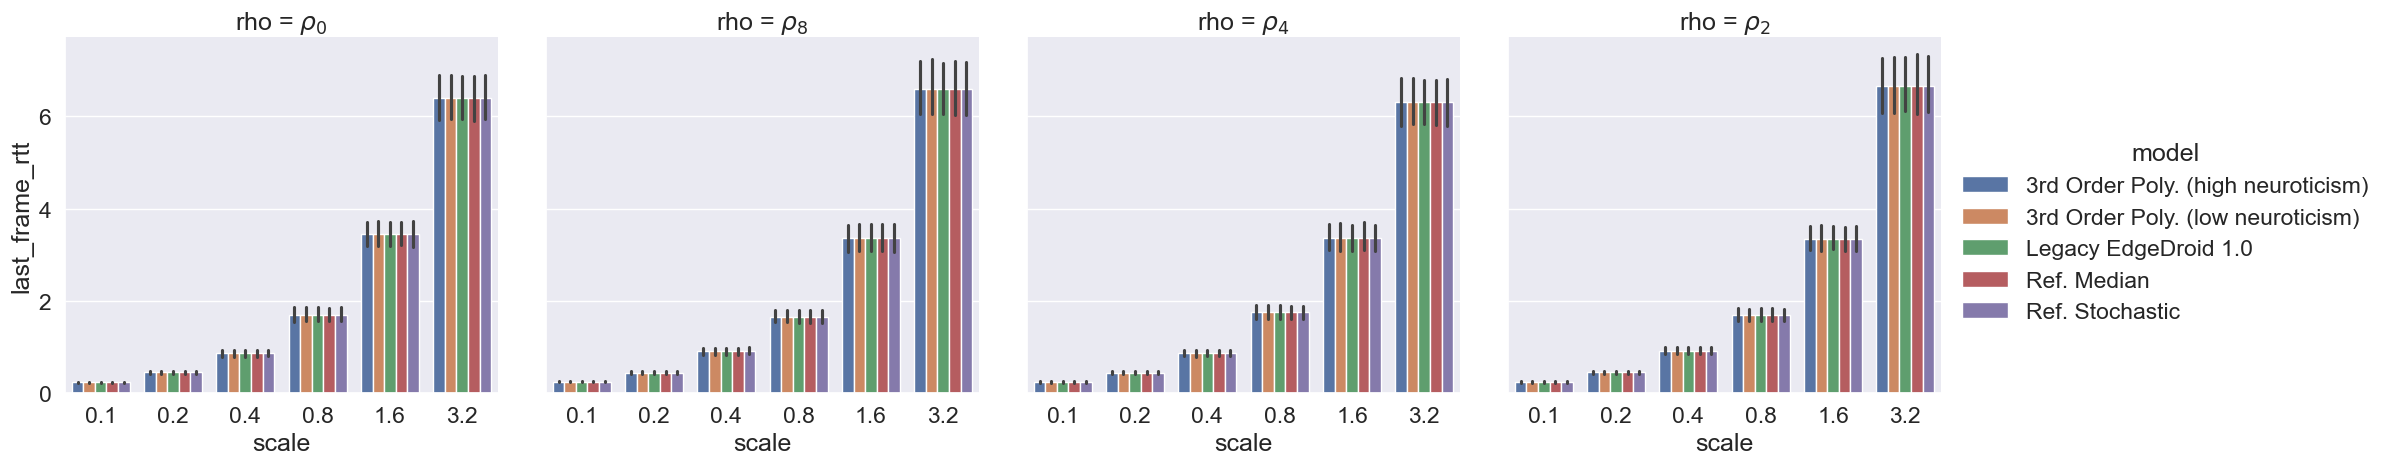

In [12]:
print("mean last frame rtt")
fg = sns.catplot(kind="bar", data=data, hue="model", y="last_frame_rtt", x="scale", col="rho")
plt.show()

In [13]:
data["rep"].max()

29